In [287]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [288]:
Melb = pd.read_csv(r'C:\Users\morte\2020_03_03_ds_pt-master\Melb_clean.csv')
pd.set_option('display.max_columns', None)
Melb.head()

,Unnamed: 0,Rooms,Price,Distance,Bathroom,BuildingArea,YearBuilt
0,2,2,1035000.0,2.5,1.0,79.0,1900.0
1,4,3,1465000.0,2.5,2.0,150.0,1900.0
2,6,4,1600000.0,2.5,1.0,142.0,2014.0
3,11,3,1876000.0,2.5,2.0,210.0,1910.0
4,14,2,1636000.0,2.5,1.0,107.0,1890.0


In [289]:
Melb.shape


(10184, 7)

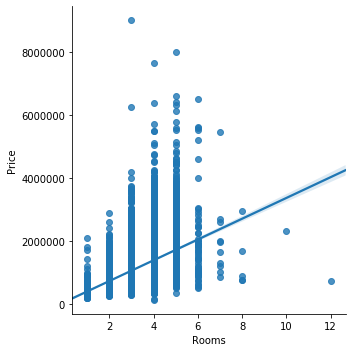

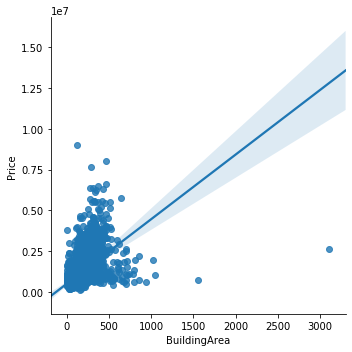

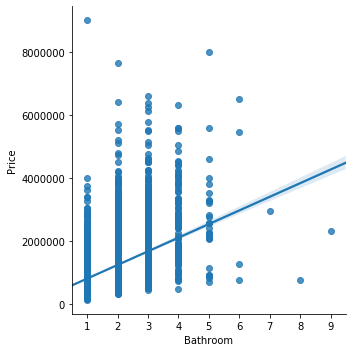

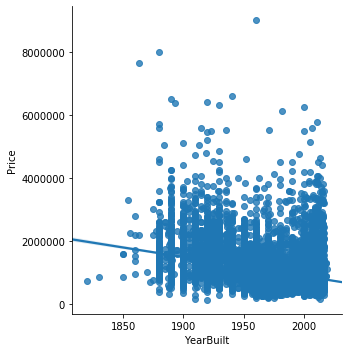

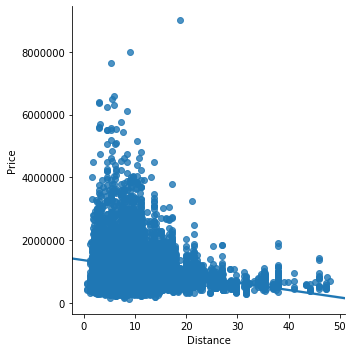

In [290]:

sns.lmplot(x='Rooms', y='Price', data=Melb)
plt.show()
sns.lmplot(x='BuildingArea', y='Price', data=Melb)
plt.show()
sns.lmplot(x='Bathroom', y='Price', data=Melb)
plt.show()
sns.lmplot(x='YearBuilt', y='Price', data=Melb)
plt.show()
sns.lmplot(x='Distance', y='Price', data=Melb)
plt.show()


In [291]:
Melb.isnull().sum()

Unnamed: 0      0
Rooms           0
Price           0
Distance        0
Bathroom        0
BuildingArea    0
YearBuilt       0
dtype: int64

In [292]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()



In [293]:
feature_cols = ['Rooms', 'YearBuilt', 'Bathroom', 'Distance', 'BuildingArea']

In [294]:
X = Melb[feature_cols].values
y = Melb['Price'].values
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [295]:
print(lr.intercept_)

11696155.876803797


In [296]:
list(zip(feature_cols, lr.coef_))

[('Rooms', 138246.98189521467),
 ('YearBuilt', -5850.721191108082),
 ('Bathroom', 250434.13125511596),
 ('Distance', -25966.290404303927),
 ('BuildingArea', 2322.159286689625)]

In [297]:
lr.score(X, y)

0.5348975660924846

In [298]:
y_pred = lr.predict(X)

In [299]:
from sklearn import metrics

print(metrics.mean_squared_error(y, y_pred))

213263172597.79227


In [300]:
X.shape

(10184, 5)

In [301]:
y.shape

(10184,)

In [302]:
y_pred.shape

(10184,)

In [303]:
Xe = [[3, 1985, 2, 15, 150]]

lr.predict(Xe)



array([956913.05758901])

In [179]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
linreg = LinearRegression()
linreg.fit(X_train, y_train)
    
y_pred_t = linreg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, y_pred_t))

448662.89615304506

In [180]:
linreg.score(X_test, y_test)

0.5640589704997471

In [181]:
y_pred_t = lr.predict(X_test)

print(metrics.mean_squared_error(y_train, linreg.predict(X_train)))
print(metrics.mean_squared_error(y_test, y_pred_t))

217611685697.67328
199343948934.14032


In [236]:
list(zip(feature_cols, linreg.coef_))

[('Rooms', 139888.3475040092),
 ('YearBuilt', -5799.440403199019),
 ('Bathroom', 257825.9227674814),
 ('Distance', -25692.533119581993),
 ('BuildingArea', 2106.370488849451)]

In [332]:
linreg.intercept_

11602355.460383648

In [182]:
Xt = [[3, 1985, 2, 15, 150]]

linreg.predict(Xt)

array([956350.72461428])

In [209]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV

In [239]:
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
ridgereg1 = optimal_ridge.fit(X, y)

print(optimal_ridge.alpha_)

108.43659686896109


In [240]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X, y, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[0.43781169 0.61127785 0.52060637 0.5219921  0.54283033 0.52516966
 0.4476853  0.5301763  0.51259866 0.54291054]
0.519305880606469


In [241]:
ridgereg1.coef_

array([138260.33627649,  -5825.97332165, 242682.15480274, -25964.97756478,
         2357.72560601])

In [243]:
list(zip(feature_cols, ridgereg1.coef_))

[('Rooms', 138260.3362764932),
 ('YearBuilt', -5825.9733216528475),
 ('Bathroom', 242682.15480274058),
 ('Distance', -25964.977564784767),
 ('BuildingArea', 2357.7256060107925)]

In [214]:
print(ridgereg.intercept_)

1178099.756905274


In [263]:
ridgereg1.score(X, y)

0.5348539209527485

In [264]:
Xr = [[3, 1985, 2, 15, 150]]

ridgereg.predict(Xr)

array([1086920.54134502])

Computing regularization path using the LARS ...
.

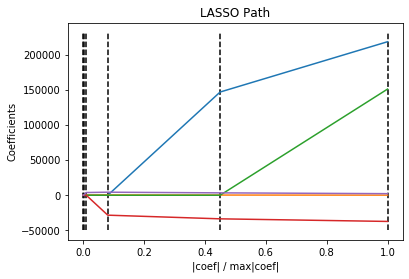

In [224]:
# LASSO regression

from sklearn import linear_model
from sklearn import datasets

print("Computing regularization path using the LARS ...")
_, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

In [248]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
lasso1 = optimal_lasso.fit(X, y)

print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

29884.446785199616


..............................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.6s finished


In [249]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X, y, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores))

[0.37155371 0.57956588 0.52994599 0.51532617 0.53734165 0.53904037
 0.44574592 0.54019889 0.52128003 0.54197071]
0.5121969315683341


In [250]:
list(zip(feature_cols, lasso1.coef_))

[('Rooms', 105972.44427039778),
 ('YearBuilt', -5725.880966515651),
 ('Bathroom', 179588.3174273341),
 ('Distance', -24385.137503271057),
 ('BuildingArea', 2851.66120746599)]

In [259]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=optimal_lasso.alpha_)
clf.fit(X, y)
print(clf.coef_)


[105972.4442704   -5725.88096652 179588.31742733 -24385.13750327
   2851.66120747]


In [260]:
print(clf.intercept_)

11570123.939984674


In [261]:
clf.score(X, y)

0.5280992503370328

In [262]:
Xl = [[3, 1985, 2, 15, 150]]

clf.predict(Xl)

array([943316.3076878])

In [195]:
# ELASTICNET

from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

X_E, y_E = make_regression(n_features=5, random_state=None)
regr = ElasticNet(random_state=0)
regr.fit(X, y)
ElasticNet(random_state=None)
print(regr.coef_)

[ 96759.28807589  -5521.82355642 109785.53844449 -24520.12751842
   3242.36270104]


In [196]:
print(regr.intercept_)

11255527.059595551


In [197]:
regr.score(X, y)

0.5136448689089474

In [198]:
X_en = [[3, 1985, 2, 15, 150]]

regr.predict(X_en)

array([923108.73359239])

In [265]:
l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,
                            verbose=1)
elast = optimal_enet.fit(X, y)

print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

29884.446785199616
1.0


..............................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    8.6s finished


In [266]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, X, y, cv=10)

print(enet_scores)
print(np.mean(enet_scores))

[0.37155371 0.57956588 0.52994599 0.51532617 0.53734165 0.53904037
 0.44574592 0.54019889 0.52128003 0.54197071]
0.5121969315683341


In [267]:
list(zip(feature_cols, elast.coef_))

[('Rooms', 105972.44427039778),
 ('YearBuilt', -5725.880966515651),
 ('Bathroom', 179588.3174273341),
 ('Distance', -24385.137503271057),
 ('BuildingArea', 2851.66120746599)]

In [268]:
elast.score(X, y)

0.5280992503370328

In [269]:
X_el = [[3, 1985, 2, 15, 150]]

elast.predict(X_el)

array([943316.3076878])

In [276]:
from sklearn import model_selection

kf = model_selection.KFold(n_splits=20, shuffle=True)

mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr_xv = LinearRegression().fit(X[train_index], y[train_index])
    
    mse_values.append(metrics.mean_squared_error(y[test_index], lr_xv.predict(X[test_index])))
    scores.append(lr_xv.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 274487606441.92175
R2: 0.534890446731995

Model 2
MSE: 213169406615.571
R2: 0.5348488072633536

Model 3
MSE: 221733935528.1889
R2: 0.5348881014221436

Model 4
MSE: 224895400455.7489
R2: 0.5348887712343442

Model 5
MSE: 321711459394.3472
R2: 0.5348882124845797

Model 6
MSE: 195433579778.75296
R2: 0.5348812157146514

Model 7
MSE: 240313104004.4321
R2: 0.5348817259574463

Model 8
MSE: 148674863770.387
R2: 0.534873608665742

Model 9
MSE: 163869754421.40958
R2: 0.5348797115606865

Model 10
MSE: 410930293876.64404
R2: 0.5331814534835196

Model 11
MSE: 236130607671.30618
R2: 0.5348847155223306

Model 12
MSE: 204987769223.9409
R2: 0.5348729235035756

Model 13
MSE: 183972212529.8797
R2: 0.5348839314959044

Model 14
MSE: 153701049362.6538
R2: 0.534882399384904

Model 15
MSE: 199480194153.74402
R2: 0.5348645824569682

Model 16
MSE: 160627197808.2793
R2: 0.5348684200779162

Model 17
MSE: 178325341558.9139
R2: 0.534892799436992

Model 18
MSE: 167259

In [279]:
from sklearn.model_selection import cross_val_score

kf = model_selection.KFold(n_splits=20, shuffle=True)

print(np.mean(-cross_val_score(lr_xv, X, y, cv=kf, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(lr_xv, X, y, cv=kf)))

215473308479.2525
0.5308474077738065


In [280]:
X_xv = [[3, 1985, 2, 15, 150]]

lr_xv.predict(X_xv)

array([958059.41141061])

In [ ]:
#KNN 

In [202]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.008248232521602514


In [203]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.013747054202670856


In [204]:
#trying KNN = 5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X, y)

y_pred_class = knn.predict(X)

In [205]:
metrics.accuracy_score(y, y_pred_class)

0.20738413197172034

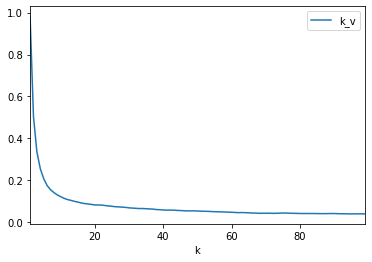

In [206]:
k_val = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    k_v = float(sum(pred == y)) / len(y)
    k_val.append([k, k_v])
    
data = pd.DataFrame(k_val,columns=['k','k_v'])
data.plot.line(x='k',y='k_v');

In [207]:

k_range = list(range(1, 101))
training_error = []
testing_error = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred_class = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [97]:
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
df.head()

,training error,testing error
K,,
1000,0.985657,0.985174
999,0.985657,0.985174
998,0.985657,0.985174
997,0.985657,0.985174
996,0.985560,0.985174


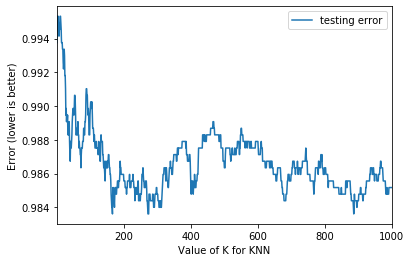

In [98]:
# Plot the relationship between K (HIGH TO LOW) and TESTING ERROR.
df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [99]:
df.sort_values('testing error').head()

,training error,testing error
K,,
167,0.971705,0.983613
887,0.984096,0.983613
275,0.977851,0.983613
273,0.977559,0.983613
274,0.977656,0.983613


In [100]:
min(list(zip(testing_error, k_range)))

(0.9836129535700351, 167)

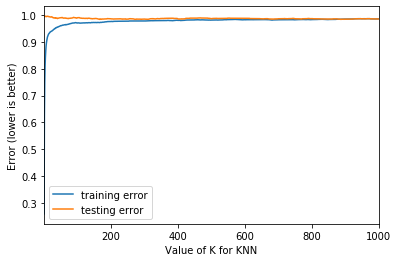

In [101]:
df.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [263]:
# Support Vector Machine (SVM)

In [313]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform([y])

In [314]:
X_scaled.shape

(10184, 5)

In [315]:
y.shape

(10184,)

In [316]:
y_pred.shape

(10184,)

In [317]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_scaled, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [318]:
y_pred1 = regressor.predict(X_scaled)
y_pred1 = sc_y.inverse_transform(y_pred) 

In [319]:
regressor.score(X_scaled, y)

-0.0800689143441442

In [320]:
X_grid = np.arange(min(X), max(X),0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_scaled, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Support Vector Regression')
plt.xlabel('X')
plt.ylabel('Price')
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

ValueError: x and y must be the same size

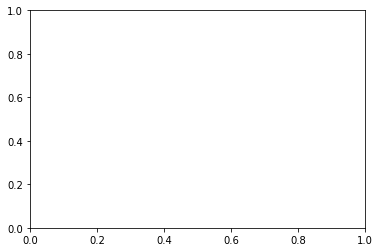

In [321]:
#6 Visualising the Support Vector Regression results
plt.scatter(X_scaled, y, color = 'magenta')
plt.plot(X_scaled, regressor.predict(X_scaled), color = 'green')
plt.title('Support Vector Regression')
plt.xlabel('X')
plt.ylabel('Price')
plt.show()

In [325]:
from sklearn import svm

regr_svm = svm.SVR()
svr = regr_svm.fit(X_scaled, y)

regr_svm.predict(X_scaled)

array([895047.38912772, 895754.94218076, 894697.50197131, ...,
       894118.23925946, 893736.78154985, 894594.26617974])

In [326]:
regr_svm.score(X_scaled, y)

-0.0800689143441442

In [327]:
svr.score(X_scaled, y)

-0.0800689143441442

In [331]:
list(zip(feature_cols, regr_svm.coef_))

AttributeError: coef_ is only available when using a linear kernel

In [329]:
X_svr = [[3, 1985, 2, 15, 150]]

regr_svm.predict(X_svr)

array([894859.95201047])